## **Importing necessary modules**

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten

<br/>

## **Load the Mnist Dataset**

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


<br/>

## **Number of images in each set**

we got 60000 images for training and 10000 for testing!

In [9]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))


60000
60000
10000
10000


<br/>

## **First image of X_train set**
This output shows the pixel values of that iamge. The range of the pixel values is 0 to 255.

In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

<br/>

## **Shape of the image**
Basically it indicates the pixel size of an image.  
1st element of the tuple - image height  
2nd element of the tuple - image width

In [11]:
X_train[0].shape

(28, 28)

<br/>

## **Let's see the image**
It's a five.

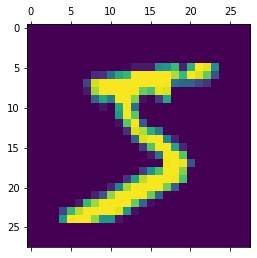

In [17]:
plt.matshow(X_train[0])

<br/>

## **Now let's see what the label of the iamge says?**
It's also five as expected.

In [13]:
y_train[0]

5

<br/>

## **Scalling**
well, now we come to the most important part of building a model - scalling.  
I built a model without scalling. It gave me a score about 40 to 50%. Then I scaled the features. See the difference in the score in your own eye!

In [44]:
X_train = X_train / 255
X_test = X_test / 255

<br/>

## **After scalling**
After scalling, the pixel values will look like this. Now they all come in the range of 0 to 1.

In [46]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

<br/>

## **Shape of X_train**

60000 - Number of images  
28 - Height of the images  
28 - width of the images

In [47]:
X_train.shape

(60000, 28, 28)

<br/>

## **Flattening X_train**
Flattening the image means convert the 28*28 array in one layer

In [48]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)

<br/>

## **After flattening**

In [49]:
X_train_flattened.shape

(60000, 784)

<br/>

## **Doing the same thing for X_test**

In [50]:
X_test.shape

(10000, 28, 28)

In [51]:
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [52]:
X_test_flattened.shape

(10000, 784)

<br/>

## **Model Architecture**

In [53]:
model = keras.Sequential()

model.add(Dense(10, input_shape = (784,), activation = 'sigmoid'))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

<br/>

## **Train the model**

In [54]:
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4868 - accuracy: 0.8781
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3062 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2855 - accuracy: 0.9213
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2748 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2681 - accuracy: 0.9264


<br/>

## **Evaluation of the model**

In [60]:
model.evaluate(X_test_flattened, y_test)[1]

313/313 [==============================] - 1s 2ms/step - loss: 0.2690 - accuracy: 0.9251


0.9251000285148621

<br/>

## **Prediction**

In [67]:
y_pred = model.predict(X_test_flattened)

<br/>

## **Let's see how accurately our model can predict**
Pick up the 1st image of X_test. It's seven.

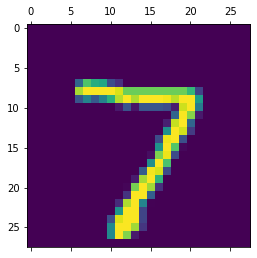

In [68]:
plt.matshow(X_test[0])

## **Now see what our model predicted**
Well, don't afraid. this values are just the probabilities of being the digit from 0 to 1.  
All we have to do is to find the index with the highest probability. So here comes up **np.argmax**.

In [69]:
y_pred[0]

array([1.12065054e-05, 1.04367695e-10, 4.19863063e-05, 1.37952603e-02,
       1.05015772e-06, 7.24984566e-05, 1.14776055e-09, 7.15854824e-01,
       6.11734285e-05, 5.96109719e-04], dtype=float32)

In [70]:
np.argmax(y_pred[0])

7

<br/>

## **Now converting all the probabilities into their corresponding index by argmax along with list comprehension**

In [71]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

<br/>

## **Time for creating a confusion matrix**

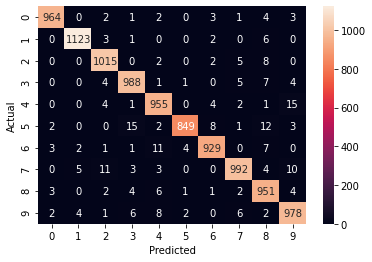

In [97]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_labels)

sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

<br/>

## **We are done! Now it's time for playing with our models. Let's see how Changing hyper-parameters, Adding hidden layers will affect our models**
<br/>
<br/>

## **Adding a hidden layer to check the new performance**



In [79]:
model = keras.Sequential()

model.add(Dense(100, input_shape = (784,), activation = 'relu'))
model.add(Dense(10, activation = 'sigmoid'))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [80]:
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2922 - accuracy: 0.9192
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1303 - accuracy: 0.9619
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0937 - accuracy: 0.9719
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0722 - accuracy: 0.9779
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0585 - accuracy: 0.9822


In [81]:
model.evaluate(X_test_flattened, y_test)[1]

313/313 [==============================] - 1s 2ms/step - loss: 0.0807 - accuracy: 0.9744


0.974399983882904

In [83]:
y_pred = model.predict(X_test_flattened)

In [84]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

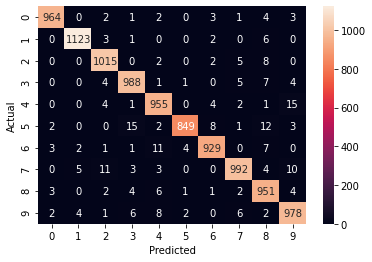

In [85]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_labels)

sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

<br/>

## **Wow! By adding just one hidden layer, our model evaluation score becomes 97% from 92%!**

<br/>

## **Note:**  
If we can remember, we just flattened the 28 x 28 image pixels in one layer. Set that layer to variable X_train_flattened and put that when we were training our models.  
**Alternative:**  
But we can also do the same thing in an alternative manner. we can add a Flattening layer to our model architecture and it will flatten the image pixels into one layer. So this time, when we will train our model, we will use X_train variable instead of X_train_flattened as our image pixels will be flattened in the model architecture.

In [88]:
model = keras.Sequential()

model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(10, activation = 'sigmoid'))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2954 - accuracy: 0.9164
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1367 - accuracy: 0.9603
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0968 - accuracy: 0.9710
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0743 - accuracy: 0.9777
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0597 - accuracy: 0.9820


In [89]:
model.evaluate(X_test, y_test)[1]

313/313 [==============================] - 1s 2ms/step - loss: 0.0841 - accuracy: 0.9750


0.9750000238418579

In [90]:
model = keras.Sequential()

model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(10, activation = 'sigmoid'))

model.compile(optimizer = 'RMSprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 5)

model.evaluate(X_test, y_test)[1]

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2952 - accuracy: 0.9181
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1487 - accuracy: 0.9570
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1101 - accuracy: 0.9678
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0883 - accuracy: 0.9739
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1033 - accuracy: 0.9712


0.9711999893188477

<br/>

## **This is just an alternative manner, So don't expected the model evaluation score to be improved**
<br/>
<br/>

## **Let's try other optimizers**

In [91]:
model = keras.Sequential()

model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(10, activation = 'sigmoid'))

model.compile(optimizer = 'SGD',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 5)

model.evaluate(X_test, y_test)[1]

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8514 - accuracy: 0.7926
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3611 - accuracy: 0.9010
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3083 - accuracy: 0.9140
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2764 - accuracy: 0.9233
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2313 - accuracy: 0.9344


0.9344000220298767

In [92]:
model = keras.Sequential()

model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(10, activation = 'sigmoid'))

model.compile(optimizer = 'Adadelta',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 5)

model.evaluate(X_test, y_test)[1]

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2837 - accuracy: 0.1206
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2180 - accuracy: 0.2060
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.1557 - accuracy: 0.3071
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.0921 - accuracy: 0.4147
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 1.9822 - accuracy: 0.5474


0.5473999977111816

In [93]:
model = keras.Sequential()

model.add(Flatten(input_shape = (28, 28)))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(10, activation = 'sigmoid'))

model.compile(optimizer = 'Nadam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 5)

model.evaluate(X_test, y_test)[1]

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2979 - accuracy: 0.9178
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1405 - accuracy: 0.9587
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1009 - accuracy: 0.9703
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0773 - accuracy: 0.9773
Epoch 5/5
313/313 [==============================] - 0s 2ms/step - loss: 0.0863 - accuracy: 0.9741


0.9740999937057495

<br/>
<br/>

**Thanks for the patience. Don't forget to share your thoughts along with suggestions in this regard. And if you find it helpful, please upvote.**